![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/06_Principal%20Component%20Analysis%20%28PCA%29/06_dimensionality-reduction-pca_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 06 | Principal Component Analysis (PCA)

## Chapter Importance

We used just two variables out of the seven we had in the whole DataFrame.

We could have computed better cluster models as we give more information to the Machine Learning model. Nevertheless, it would have been **harder to plot seven variables with seven axis in a graph**.

Is there anything we can do compute a clustering model with more than two variables and later represent all the points along with their variables?

- Yes, everything is possible with data. As one of my teachers told me: "you can torture the data untill it gives you what you want" (sometimes it's unethical, so behave).

We'll develop the code to show you the need for **dimensionality reduction** techniques. Especifically, the Principal Component Analysis (PCA).

## [ ] Load the Data

Imagine for a second you are the president of the United States of America and you are considering to create campaigns to reduce **car accidents**.

You won't create 51 different TV campaigns for each one of the **States of USA** (rows). Instead, you will see which States behave in a similar manner to cluster them into 3 groups, based on the variation accross their features (columns).

In [1]:
import seaborn as sns #!

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05


> Check [this website](https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/) to understand the measures of the following data.

## Data Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
scaler.fit(X=df_crashes)

StandardScaler()

In [5]:
scaled = scaler.transform(df_crashes)

In [6]:
import pandas as pd

In [7]:
df_scaled = pd.DataFrame(scaled, columns=df_crashes.columns, index=df_crashes.index)
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
AZ,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
AR,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
CA,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178
CO,-0.536630,0.016920,-0.630095,-0.633698,-0.291042,-0.291479,0.220276
CT,-1.222671,-0.015114,-0.583369,-0.935632,-1.381293,1.029641,1.322702
DE,0.100408,0.579520,-0.015644,0.116657,0.545426,1.421281,0.690769
DC,-2.423242,-1.497695,-1.923831,-1.718689,-2.174301,2.191759,0.063310


## k-Means Model in Python

### Import the Class

In [8]:
from sklearn.cluster import KMeans

### Instantiate the Class

In [9]:
model_kms = KMeans(n_clusters=3)

### Fit the Model

In [10]:
model_kms.fit(X=df_scaled)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

### Calculate Predictions

In [11]:
model_kms.predict(df_scaled)

array([1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 1])

### Create a New DataFrame for the Predictions

In [12]:
df_pred = df_scaled.copy()
df_pred.insert(0, 'pred_kms', model_kms.predict(df_scaled))

### Create a New Column for the Predictions

In [13]:
df_pred

,pred_kms,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,,
AL,1,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,1,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
AZ,1,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
AR,1,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
CA,0,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178
CO,2,-0.536630,0.016920,-0.630095,-0.633698,-0.291042,-0.291479,0.220276
CT,0,-1.222671,-0.015114,-0.583369,-0.935632,-1.381293,1.029641,1.322702
DE,1,0.100408,0.579520,-0.015644,0.116657,0.545426,1.421281,0.690769
DC,0,-2.423242,-1.497695,-1.923831,-1.718689,-2.174301,2.191759,0.063310


### Visualize the Model

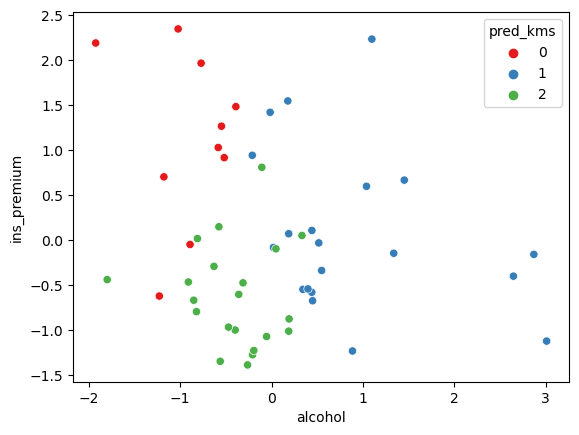

In [14]:
sns.scatterplot(x='alcohol', y='ins_premium', data=df_pred, hue='pred_kms', palette='Set1');

### Model Interpretation

In [15]:
model_kms.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
        'ins_premium', 'ins_losses'], dtype=object),
 'n_features_in_': 7,
 '_n_init': 10,
 '_tol': 0.0001,
 '_algorithm': 'lloyd',
 '_n_threads': 4,
 'cluster_centers_': array([[-1.23002106, -0.87983624, -0.90554717, -0.91825024, -1.31527198,
          1.12381767,  0.79763658],
        [ 0.96163405,  0.86397325,  0.88123859,  0.90862935,  0.90685299,
          0.08677855,  0.12723491],
        [-0.33011764, -0.40386203, -0.40806191, -0.42809927, -0.23734953,
         -0.61779751, -0.50100305]]),
 '_n_features_out': 3,
 'labels_': array([1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0,
        0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
        2, 2, 2, 2, 1, 2, 1]),
 'inertia_': 171.2880174

## [ ] Grouping Variables with `PCA()`

You need to group the original variables of the `DataFrame` in to components so that the groups are clearly separated from each other when we visualize it:

![](src/pca.png)

### Transform Data to Components

`PCA()` is another technique used to transform data.

How has the data been manipulated so far?

1. Original Data `df_crashes`

In [16]:
df_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.640,18.048,15.040,784.55,145.08
AK,18.1,7.421,4.525,16.290,17.014,1053.48,133.93
AZ,18.6,6.510,5.208,15.624,17.856,899.47,110.35
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
CA,12.0,4.200,3.360,10.920,10.680,878.41,165.63
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48
DC,5.9,2.006,1.593,5.900,5.900,1273.89,136.05


2. Normalized Data `df_scaled`

In [17]:
df_scaled

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,0.737446,1.168148,0.439938,1.002301,0.277692,-0.580083,0.430514
AK,0.565936,1.212695,-0.211311,0.608532,0.807258,0.943258,-0.022900
AZ,0.688443,0.756709,0.187615,0.459357,1.033141,0.070876,-0.981778
AR,1.619498,-0.483614,0.547408,1.676052,1.951700,-0.337701,0.321125
CA,-0.928653,-0.399524,-0.891763,-0.594276,-0.891968,-0.048418,1.266178
CO,-0.536630,0.016920,-0.630095,-0.633698,-0.291042,-0.291479,0.220276
CT,-1.222671,-0.015114,-0.583369,-0.935632,-1.381293,1.029641,1.322702
DE,0.100408,0.579520,-0.015644,0.116657,0.545426,1.421281,0.690769
DC,-2.423242,-1.497695,-1.923831,-1.718689,-2.174301,2.191759,0.063310


3. Principal Components Data `df_pca` (now)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA()

In [20]:
pca.fit(X=df_scaled)

PCA()

In [21]:
data_pca=pca.transform(X=df_scaled)

In [22]:
col_pca = [f'PC{i}'for i in list(range(1,8))]

In [23]:
col_pca

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']

In [24]:
df_pca = pd.DataFrame(data_pca, index=df_crashes.index, columns = col_pca)

In [25]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
abbrev,,,,,,,
AL,1.603671,0.133449,0.317881,-0.795293,-0.579719,0.046223,0.210185
AK,1.144212,0.858234,0.736626,0.318988,-0.228701,-1.002625,0.008966
AZ,1.432172,-0.420506,0.338136,0.552513,0.168718,-0.804523,-0.076107
AR,2.491584,0.348968,-1.788747,0.264064,-0.372382,-0.481849,-0.147636
CA,-1.750638,0.633625,-0.136176,-0.974916,-0.315811,0.178510,-0.068958
CO,-0.925120,-0.154388,0.146177,-0.568096,0.116420,-0.240859,-0.098428
CT,-2.125359,1.370600,0.743078,-0.485553,-0.088337,0.486531,0.020256
DE,0.324658,1.574245,0.440982,0.338057,0.095481,-0.466100,-0.188961
DC,-4.635926,0.918997,0.720078,1.184313,-0.172554,-0.052800,-0.124806


### Visualize Components & Clusters

In [26]:
import plotly.express as px

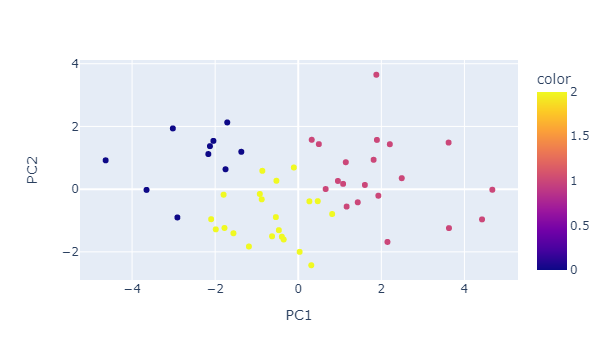

In [29]:
px.scatter(data_frame=df_pca, x='PC1', y='PC2', color=df_pred.pred_kms, hover_name=df_crashes.index)

## [ ] Explained Variance Ratio

In [31]:
pca.explained_variance_ratio_

array([0.57342168, 0.22543042, 0.07865743, 0.05007557, 0.04011   ,
       0.02837999, 0.00392491])

In [33]:
pca.explained_variance_ratio_.cumsum()

array([0.57342168, 0.7988521 , 0.87750953, 0.9275851 , 0.9676951 ,
       0.99607509, 1.        ])

## [ ] Relationship between Original Variables & Components

### Loading Vectors

In [34]:
df_weights = pd.DataFrame(pca.components_.T, columns=col_pca, index=df_crashes.columns)

In [35]:
df_weights.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
total,0.479471,0.068938,-0.269088,0.038956,0.145977,-0.169705,0.800825
speeding,0.375347,0.076585,0.818269,-0.363749,-0.022828,-0.224792,0.017848
alcohol,0.454376,0.033458,0.082933,0.148344,0.354798,0.783768,-0.152858
not_distracted,0.438033,0.042375,-0.126168,0.171266,-0.856469,0.085105,-0.142478
no_previous,0.457034,0.096129,-0.317988,0.039481,0.336110,-0.504012,-0.558754
ins_premium,-0.130832,0.685227,0.256142,0.656396,0.042145,-0.115773,0.041266
ins_losses,-0.069960,0.712524,-0.261735,-0.618399,-0.063272,0.178052,-0.028050


### Correlation Matrix

<AxesSubplot:>

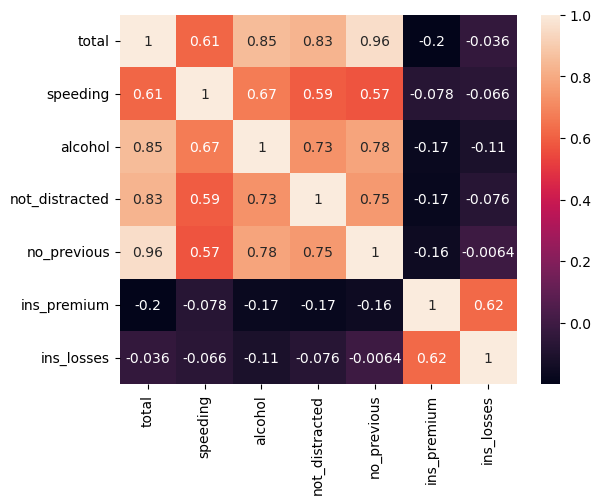

In [36]:
sns.heatmap(df_scaled.corr(), annot=True)

### [ ] Calculating One PCA Value

In [37]:
(df_weights['PC1']*df_scaled.loc['AL']).sum()

1.603671292063867

## [ ] PCA & Cluster Interpretation

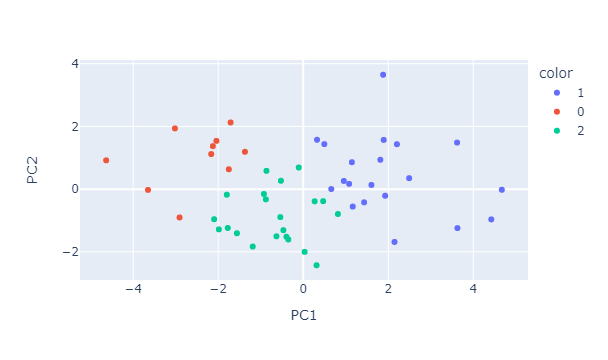

In [41]:
px.scatter(data_frame=df_pca, x='PC1', y='PC2', color=df_pred.pred_kms.astype(str), hover_name=df_pca.index)

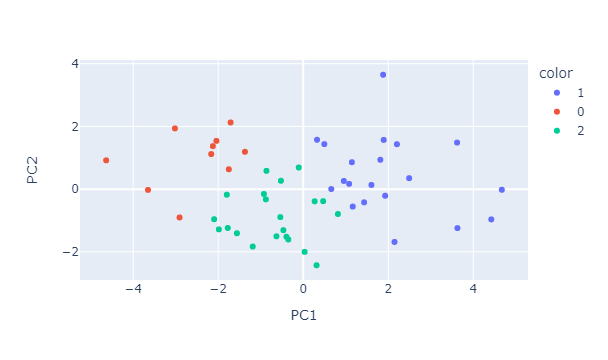

In [43]:
hover = '''
<b>%{customdata[0]}</b><br><br>
PC1: %{x}<br>
Total: %{customdata[1]}<br>
Alcohol: %{customdata[2]}<br><br>
PC2: %{y}<br>
Ins Losses: %{customdata[3]}<br>
Ins Premium: %{customdata[4]}
'''

fig = px.scatter(data_frame=df_pca, x='PC1', y='PC2',
                 color=df_pred.pred_kms.astype(str),
                 hover_data=[df_pca.index, df_crashes.total, df_crashes.alcohol,
                             df_crashes.ins_losses, df_crashes.ins_premium])

fig.update_traces(hovertemplate = hover)


In [44]:
df_crashes.agg(['min', 'max'])

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
min,5.9,1.792,1.593,1.760,5.90,641.96,82.75
max,23.9,9.450,10.038,23.661,21.28,1301.52,194.78


In [45]:
df_weights.style.background_gradient()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
total,0.479471,0.068938,-0.269088,0.038956,0.145977,-0.169705,0.800825
speeding,0.375347,0.076585,0.818269,-0.363749,-0.022828,-0.224792,0.017848
alcohol,0.454376,0.033458,0.082933,0.148344,0.354798,0.783768,-0.152858
not_distracted,0.438033,0.042375,-0.126168,0.171266,-0.856469,0.085105,-0.142478
no_previous,0.457034,0.096129,-0.317988,0.039481,0.336110,-0.504012,-0.558754
ins_premium,-0.130832,0.685227,0.256142,0.656396,0.042145,-0.115773,0.041266
ins_losses,-0.069960,0.712524,-0.261735,-0.618399,-0.063272,0.178052,-0.028050


### Biplot

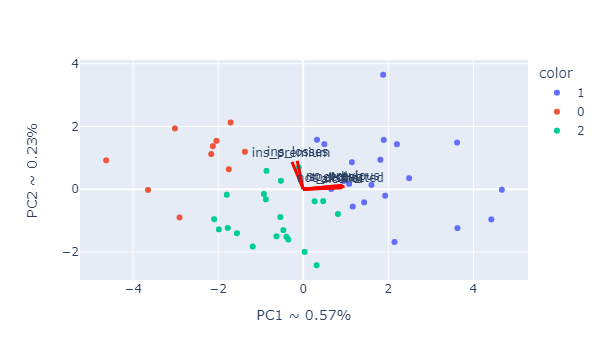

In [ ]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
evr = pca.explained_variance_ratio_.round(2)

fig = px.scatter(df_pca, x='PC1', y='PC2',
                 color=model_kms.labels_.astype(str),
                 hover_name=df_pca.index,
                labels={
                    'PC1': f'PC1 ~ {evr[0]}%',
                    'PC2': f'PC2 ~ {evr[1]}%'
                })

for i, feature in enumerate(df_scaled.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line=dict(color="red",width=3)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()

## Conclusion

Dimensionality Reduction techniques have many more applications, but hopefully you got the essence: they are great for grouping variables that behave similarly and later visualising many variables in just one component. In short, you are simplifying the information of the data. In this example, we simplify the data from plotting seven to only two dimensions. Although we don't get this for free because we explain around 80% of the data's original variability.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.